In [19]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

In [46]:
#!pip install pymongo

     -------------------------------------- 408.2/408.2 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 300.0/300.0 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 74.5/74.5 kB ? eta 0:00:00


In [50]:
import nltk
from pymongo import MongoClient
import re
import json
import time

In [4]:
# txt 파일 열어주기
f = open('20230725_etnews_생성형AI.txt', 'r')
data = f.read()
print(data)

발행일 : 2023-07-25 13:40<비상교육 한국어 통합 교육 플랫폼 '마스터케이' 로고>
비상교육이 생성형 인공지능(AI)을 이용해 외국인이 언제 어디서나 한국어 대화·채팅을 통해 말하기와 쓰기 연습을 할 수 있는 '외국인 한국어 학습용 초거대 AI 대화 시스템'을 개발한다.

비상교육은 6월 정보통신기획평가원(IITP)에서 공고한 총 사업비 5억8000만원 규모의 정보통신기술(ICT) 연구개발(R&D) 혁신 바우처 지원 사업 주관 사업자로 선정됐다. 비상교육은 다른 AI와의 차별화를 위해 비상한국어 교재와 토픽(TOPIK) 기출 문제, 각종 한국어 교육 데이터를 집중 학습시켜 한국어 교육에 특화된 AI를 개발할 계획이다.

외국인 한국어 학습용 초거대 AI 대화 시스템은 국적에 따라 서로 다른 외국인의 한국어 발음을 AI가 이해하고, 학습자 수준에 맞게 응답하며 한국어 회화 실력을 키워주는 AI 솔루션이다. AI와 채팅하는 기능도 있어 자연스럽게 말하기와 쓰기 실력을 높일 수 있다.

비상교육은 소프트웨어 개발 전문 기업 이튜와 1년의 공동 연구 개발 기간을 거쳐 내년 초 시제품을 공개할 예정이다. 비상교육은 한국어 통합 교육 플랫폼 '마스터케이'와 한국어 서비스인 '마스터토픽', '마스터코리안' 사이트 등에 이 시스템을 탑재해 한국어 교육 서비스 수준을 한 단계 끌어 올린다는 전략이다.

내년 3월부터 베트남 초중고 학교 대상으로 보급하는 마스터케이에 외국인 한국어 학습용 초거대 AI 대화 시스템을 탑재해 베트남 공교육 현장부터 우선 적용한다.

김광수 이튜 대표는 “챗GPT와 같은 초거대 AI를 활용해 학습자 수준과 상황별로 정교한 답변을 구현하겠다”며 “비상교육 플랫폼뿐만 아니라 다양한 교육 기관과 연동할 수 있도록 확장성 있게 개발할 것”이라고 전했다.

노중일 비상교육 GEO 코어그룹 대표는 “비상교육은 최첨단 플랫폼과 AI를 활용해 베트남 내 한국어 교사 부족 문제를 해결하고 한국어 교원 양성 분야에도 기여할 것”이라며 “베트남 중·고교에서

In [5]:
from konlpy.tag import Okt
from collections import Counter

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(data)

n_adj = []
# 명사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun'] and len(word) > 1:
        n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for word, tag in line if tag in ['Noun','Adjective'] and len(word) > 1]
print(n_adj)

['발행', '비상교육', '한국어', '통합', '교육', '플랫폼', '마스터', '케이', '로고', '비상교육', '성형', '인공', '지능', '이용', '외국인', '언제', '어디', '서나', '한국어', '대화', '채팅', '통해', '쓰기', '연습', '외국인', '한국어', '학습', '거대', '대화', '시스템', '개발', '비상교육', '정보통', '기획', '평가원', '공고', '사업', '규모', '정보통', '기술', '연구개발', '혁신', '지원', '사업', '주관', '사업자', '선정', '비상교육', '다른', '차별', '위해', '비상', '한국어', '교재', '토픽', '기출', '문제', '각종', '한국어', '교육', '데이터', '집중', '학습', '한국어', '교육', '특화된', '개발', '계획', '외국인', '한국어', '학습', '거대', '대화', '시스템', '국적', '서로', '다른', '외국인', '한국어', '발음', '이해', '학습자', '수준', '응답', '한국어', '회화', '실력', '솔루션', '채팅', '기능', '자연', '쓰기', '실력', '비상교육', '소프트웨어', '개발', '전문', '기업', '이튜', '공동', '연구', '개발', '기간', '내년', '제품', '공개', '예정', '비상교육', '한국어', '통합', '교육', '플랫폼', '마스터', '케이', '한국어', '서비스', '마스터', '토픽', '마스터', '코리안', '사이트', '시스템', '탑재', '한국어', '교육', '서비스', '수준', '단계', '올린다', '전략', '내년', '베트남', '중고', '학교', '대상', '보급', '마스터', '케이', '외국인', '한국어', '학습', '거대', '대화', '시스템', '탑재', '베트남', '공교육', '현장', '우선', '적용', '김광수', '이튜', '대표', '거대', '활용', '학습자',

In [17]:
#제외할 단어 추가
stop_words = "발행 마련 게티 이미지 뱅크 달리 차량 위해 상위 있다 기술 개발 최근 전자신문 생성형 성형 인공 지능 통해 대표 " #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]

In [18]:
n_adj

['비상교육',
 '한국어',
 '통합',
 '교육',
 '플랫폼',
 '마스터',
 '케이',
 '로고',
 '비상교육',
 '이용',
 '외국인',
 '언제',
 '어디',
 '서나',
 '한국어',
 '대화',
 '채팅',
 '쓰기',
 '연습',
 '외국인',
 '한국어',
 '학습',
 '거대',
 '대화',
 '시스템',
 '비상교육',
 '정보통',
 '기획',
 '평가원',
 '공고',
 '사업',
 '규모',
 '정보통',
 '연구개발',
 '혁신',
 '지원',
 '사업',
 '주관',
 '사업자',
 '선정',
 '비상교육',
 '다른',
 '차별',
 '비상',
 '한국어',
 '교재',
 '토픽',
 '기출',
 '문제',
 '각종',
 '한국어',
 '교육',
 '데이터',
 '집중',
 '학습',
 '한국어',
 '교육',
 '특화된',
 '계획',
 '외국인',
 '한국어',
 '학습',
 '거대',
 '대화',
 '시스템',
 '국적',
 '서로',
 '다른',
 '외국인',
 '한국어',
 '발음',
 '이해',
 '학습자',
 '수준',
 '응답',
 '한국어',
 '회화',
 '실력',
 '솔루션',
 '채팅',
 '기능',
 '자연',
 '쓰기',
 '실력',
 '비상교육',
 '소프트웨어',
 '전문',
 '기업',
 '이튜',
 '공동',
 '연구',
 '기간',
 '내년',
 '제품',
 '공개',
 '예정',
 '비상교육',
 '한국어',
 '통합',
 '교육',
 '플랫폼',
 '마스터',
 '케이',
 '한국어',
 '서비스',
 '마스터',
 '토픽',
 '마스터',
 '코리안',
 '사이트',
 '시스템',
 '탑재',
 '한국어',
 '교육',
 '서비스',
 '수준',
 '단계',
 '올린다',
 '전략',
 '내년',
 '베트남',
 '중고',
 '학교',
 '대상',
 '보급',
 '마스터',
 '케이',
 '외국인',
 '한국어',
 '학습',
 '거대',
 '대화',
 '시스템',
 '탑재',
 '

In [19]:
#가장 많이 나온 단어 200개 저장
counts = Counter(n_adj)
tags = counts.most_common(200)

In [20]:
tags

[('데이터', 753),
 ('기업', 677),
 ('서비스', 639),
 ('활용', 580),
 ('산업', 381),
 ('제공', 352),
 ('모델', 341),
 ('기반', 312),
 ('한국', 309),
 ('기자', 300),
 ('고객', 294),
 ('디지털', 275),
 ('혁신', 274),
 ('분야', 268),
 ('대한', 266),
 ('교육', 265),
 ('지원', 258),
 ('사업', 253),
 ('정보', 244),
 ('플랫폼', 241),
 ('학습', 238),
 ('국내', 234),
 ('시장', 220),
 ('클라우드', 215),
 ('거대', 200),
 ('업무', 194),
 ('사용', 190),
 ('글로벌', 186),
 ('구축', 185),
 ('네이버', 177),
 ('보안', 175),
 ('센터', 174),
 ('진행', 171),
 ('관련', 170),
 ('반도체', 167),
 ('문제', 163),
 ('테크', 158),
 ('전략', 155),
 ('솔루션', 154),
 ('금융', 153),
 ('적용', 152),
 ('운영', 151),
 ('오픈', 150),
 ('발전', 149),
 ('발표', 146),
 ('분석', 145),
 ('메타', 145),
 ('시대', 144),
 ('대해', 143),
 ('미래', 143),
 ('기능', 139),
 ('사회', 137),
 ('도입', 135),
 ('확보', 135),
 ('정책', 135),
 ('언어', 134),
 ('세계', 131),
 ('지난', 131),
 ('전문', 130),
 ('관리', 130),
 ('연구', 129),
 ('콘텐츠', 129),
 ('버스', 129),
 ('과정', 127),
 ('투자', 125),
 ('스타트업', 125),
 ('규제', 124),
 ('미국', 123),
 ('교수', 121),
 ('계획', 120),
 ('경험',

In [21]:
# 이미지 추가(워드크라우드 모양 설정)
#import numpy as np
from PIL import Image

#mask = Image.new("RGBA",(2275,2275), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
#image = Image.open('heart.png').convert("RGBA")
#x,y = image.size
#mask.paste(image,(0,0,x,y),image)
#mask = np.array(mask)

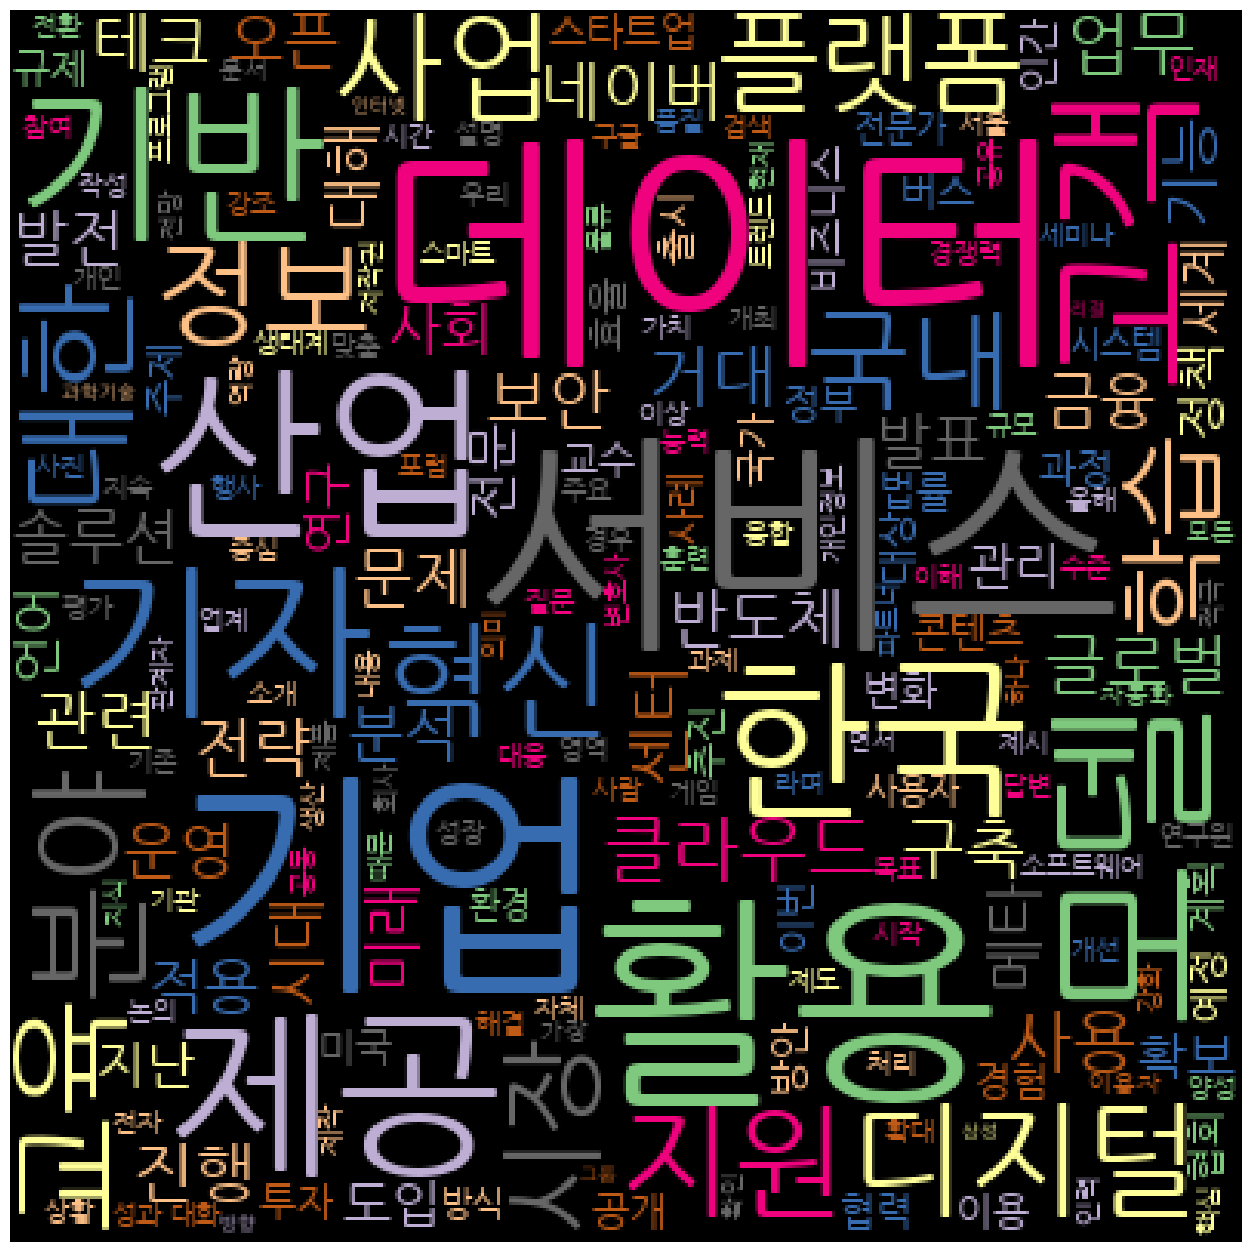

In [22]:
from wordcloud import WordCloud

###WordCloud(워드크라우드) 만들기###
#폰트지정
font='NanumGothic.ttf'
word_cloud = WordCloud(font_path=font, background_color='black', width = 400, height = 400, max_font_size=80, colormap='Accent').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('wc_c-its.png', bbox_inches='tight')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(n_adj)

## LDA 토픽 모델링 실행

### Gensim을 이용한 토픽 모델링

In [24]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in stop_words) and len(word) > 2]
    return words

news = [tokenizer(n_adj) for n_adj in n_adj]

In [25]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(news)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in news]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 2264
#Number of unique words after removing rare and common words: 529
#Number of unique tokens: 529
#Number of documents: 61989


In [26]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)
# corpus는 doc2bow()를 이용해 변환된 카운터 벡터 리스트

CPU times: total: 8.86 s
Wall time: 8.84 s


In [27]:
model.print_topics(num_words=10)
# print_topics 함수는 각 토픽의 상위 비중 단어를 볼 수 있는 gensim 패키지 내장 함수이다.
# num_topics 매개변수로 보고 싶은 토픽의 수를, num_words로 각 토픽의 상위 단어 수를 지정할 수 있다.

[(0,
  '0.296*"비즈니스" + 0.133*"지난해" + 0.112*"세미나" + 0.085*"콘퍼런스" + 0.081*"우리나라" + 0.053*"메모리" + 0.049*"소비자" + 0.033*"아이디어" + 0.025*"애플리케이션" + 0.017*"로부터"'),
 (1,
  '0.538*"서비스" + 0.115*"저작권" + 0.097*"소프트웨어" + 0.068*"가능성" + 0.060*"이용자" + 0.026*"테스트" + 0.011*"특화된" + 0.009*"김장현" + 0.009*"사람과" + 0.008*"얼마나"'),
 (2,
  '0.390*"클라우드" + 0.193*"전문가" + 0.078*"네트워크" + 0.050*"연구소" + 0.043*"노하우" + 0.031*"디자인" + 0.024*"창의성" + 0.014*"스케일" + 0.013*"지난달" + 0.011*"시나리오"'),
 (3,
  '0.387*"글로벌" + 0.168*"연구원" + 0.065*"오프라인" + 0.064*"부작용" + 0.058*"연구자" + 0.048*"오히려" + 0.032*"한국어" + 0.031*"방향성" + 0.000*"이러닝" + 0.000*"트렌드"'),
 (4,
  '0.465*"콘텐츠" + 0.120*"관계자" + 0.070*"변호사" + 0.062*"디바이스" + 0.048*"그랜드" + 0.038*"함봉균" + 0.030*"대부분" + 0.022*"스튜디오" + 0.022*"김명희" + 0.008*"가트너"'),
 (5,
  '0.381*"디지털" + 0.156*"개인정보" + 0.071*"최적화" + 0.063*"학습자" + 0.061*"마케팅" + 0.059*"활성화" + 0.056*"파트너" + 0.025*"중요성" + 0.019*"바이오" + 0.018*"벤처기업"'),
 (6,
  '0.131*"프로세스" + 0.124*"실시간" + 0.084*"목소리" + 0.070*"따라서" + 0.062*"개인정보보호법" + 0.061*

In [28]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.10000082), (1, 0.099989496), (2, 0.10000924), (3, 0.10001509), (4, 0.10000569), (5, 0.0999911), (6, 0.10000781), (7, 0.0999943), (8, 0.099987), (9, 0.09999947)]


In [29]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.414493  0.144179       1        1  12.521189
1      0.089073 -0.423721       2        1  11.620954
7     -0.024028  0.022889       3        1  10.274949
5      0.013111 -0.003862       4        1  10.240492
9     -0.071171  0.042405       5        1   9.713522
2     -0.086826  0.043821       6        1   9.452507
0     -0.074477  0.042929       7        1   9.430660
3     -0.088313  0.042946       8        1   8.921232
6     -0.090061  0.045207       9        1   8.912318
4     -0.081803  0.043207      10        1   8.912177, topic_info=     Term        Freq       Total Category  logprob  loglift
9     데이터  974.000000  974.000000  Default  30.0000  30.0000
14    서비스  730.000000  730.000000  Default  29.0000  29.0000
115   콘텐츠  485.000000  485.000000  Default  28.0000  28.0000
143   디지털  457.000000  457.000000  Default  27.0000  27.0000
60   클라우드  431.000000  431.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
129   대규모    0.231815    2.010374  Topic10  -8.4082   0.2576
514   레드햇    0.232531    2.017051  Topic10  -8.4051   0.2574
348  아카데미    0.231447    2.008531  Topic10  -8.4097   0.2569
142   인프라    0.231243    2.006879  Topic10  -8.4106   0.2569
181   위원장    0.231431    2.008709  Topic10  -8.4098   0.2568

[672 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
103       2  0.981260      가능성
46       10  0.796481      가트너
96        4  0.988200     개인정보
80        9  0.967415  개인정보보호법
35        9  0.920789      결과물
...     ...       ...      ...
11        4  0.977343      학습자
1         8  0.959666      한국어
68       10  0.963999      함봉균
114       6  0.804827      호기심
83        4  0.972619      활성화

[120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 8, 6, 10, 3, 1, 4, 7, 5])

In [30]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-20.25300604475155


num_topics: 6, perplexity: -6.198, coherence: -20.553
num_topics: 7, perplexity: -6.468, coherence: -20.409
num_topics: 8, perplexity: -7.653, coherence: -20.366
num_topics: 9, perplexity: -10.886, coherence: -20.384
num_topics: 10, perplexity: -14.263, coherence: -20.430
num_topics: 11, perplexity: -17.291, coherence: -20.557
num_topics: 12, perplexity: -18.432, coherence: -20.544
num_topics: 13, perplexity: -19.624, coherence: -20.526
num_topics: 14, perplexity: -20.680, coherence: -20.354
num_topics: 15, perplexity: -21.893, coherence: -20.370
num_topics: 16, perplexity: -23.107, coherence: -20.373
num_topics: 17, perplexity: -24.251, coherence: -20.353
num_topics: 18, perplexity: -25.346, coherence: -19.902
num_topics: 19, perplexity: -26.594, coherence: -19.571
num_topics: 20, perplexity: -27.615, coherence: -19.581
num_topics: 21, perplexity: -28.866, coherence: -19.547
num_topics: 22, perplexity: -30.283, coherence: -19.548
num_topics: 23, perplexity: -31.357, coherence: -19.460

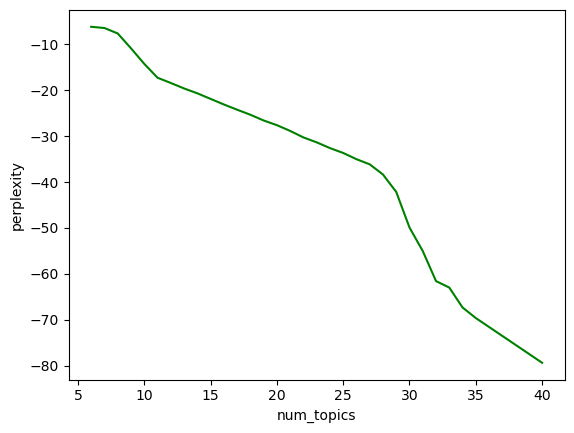

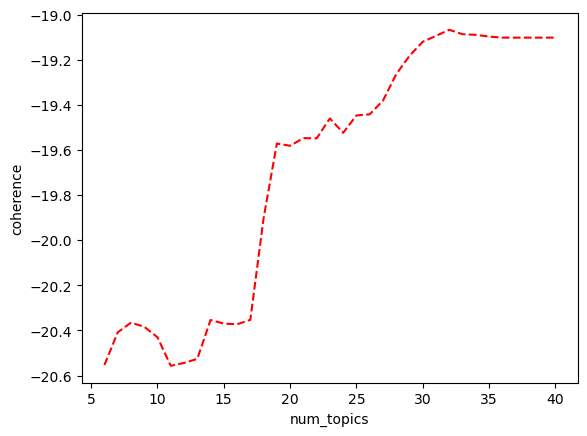

In [31]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=40)

In [32]:
from gensim.models import LdaModel

num_topics = 20 # 혼란도와 토픽 응집도 분포에 따라 토픽의 개수를 10개에서 6개로 조정
passes = 100
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 3min 3s
Wall time: 3min 3s
